In [1]:
###################################################################################
#                      1. 통계분석 (사용 데이터 : Admission)                  
###################################################################################

# Q1

In [2]:
#---------------------------------------------------------------------------------
# Q1) 종속변수인 chance_of_admit(입학 허가 확률)와 독립변수(GRE, TOEFL, 
#     Univ_Rating, SOP, LOR, CGPA)에 대해 피어슨 상관계수를 이용한 상관관계 분석을 
#     수행하고 그래프를 이용하여 분석결과를 설명하시오.
#---------------------------------------------------------------------------------

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('Admission.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GRE              400 non-null    int64  
 1   TOEFL            400 non-null    int64  
 2   Univ_Rating      400 non-null    int64  
 3   SOP              400 non-null    float64
 4   LOR              400 non-null    float64
 5   CGPA             400 non-null    float64
 6   Research         400 non-null    int64  
 7   Chance_of_Admit  400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [85]:
df.describe()

,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
df.corr()

,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
GRE,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
Univ_Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance_of_Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

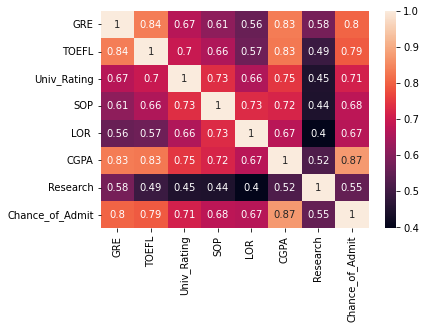

In [14]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

In [16]:
df.corr()['Chance_of_Admit'].sort_values()

Research           0.553202
LOR                0.669889
SOP                0.675732
Univ_Rating        0.711250
TOEFL              0.791594
GRE                0.802610
CGPA               0.873289
Chance_of_Admit    1.000000
Name: Chance_of_Admit, dtype: float64

## 해설
1. 모두 양의 상관관계가 있음
1. CGPA > GRE > TOEFL... 순으로 양의 상관관계

# Q2

In [17]:
#---------------------------------------------------------------------------------
# Q2) GRE, TOEFL, Univ_Rating, SOP, LOR, CGPA, Research가 Chance_of_Admit에 
#     영향을 미치는지 알아보는 회귀분석을 단계적 선택법을 사용하여 수행하고 결과를 해석하시오.
#---------------------------------------------------------------------------------

In [32]:
from statsmodels.formula.api import ols

In [33]:
df.columns = ['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR', 'CGPA', 'Research',
       'Chance_of_Admit']

In [45]:
#1
model = ols("Chance_of_Admit ~ 1", data = df)
print(model.fit().aic)
for x in df.columns:
    if x != "Chance_of_Admit":
        model_str = "Chance_of_Admit ~ " + x
        model = ols(model_str,data = df)
        print(model_str,model.fit().aic)

-421.9675008461153
Chance_of_Admit ~ GRE -833.3036090625237
Chance_of_Admit ~ TOEFL -814.0320596259335
Chance_of_Admit ~ Univ_Rating -701.9557569911271
Chance_of_Admit ~ SOP -663.9413039109054
Chance_of_Admit ~ LOR -658.194962759449
Chance_of_Admit ~ CGPA -995.2280599502851
Chance_of_Admit ~ Research -566.0996208404796


In [48]:
#2
model = ols("Chance_of_Admit ~ CGPA", data = df)
print(model.fit().aic)
for x in df.columns:
    if (x != "Chance_of_Admit") & (x!= "CGPA"):
        model_str = "Chance_of_Admit ~ CGPA+" + x
        model = ols(model_str,data = df)
        print(model_str,model.fit().aic)

-995.2280599502851
Chance_of_Admit ~ CGPA+GRE -1025.5660336332685
Chance_of_Admit ~ CGPA+TOEFL -1018.9842529381585
Chance_of_Admit ~ CGPA+Univ_Rating -1006.8680389342708
Chance_of_Admit ~ CGPA+SOP -1001.5274984560579
Chance_of_Admit ~ CGPA+LOR -1015.7470076699437
Chance_of_Admit ~ CGPA+Research -1015.9356808220818


In [49]:
#3
model = ols("Chance_of_Admit ~ CGPA+GRE", data = df)
print(model.fit().aic)
for x in df.columns:
    if (x != "Chance_of_Admit") & (x!= "CGPA") & (x!= "GRE"):
        model_str = "Chance_of_Admit ~ CGPA+GRE+" + x
        model = ols(model_str,data = df)
        print(model_str,model.fit().aic)

-1025.5660336332685
Chance_of_Admit ~ CGPA+GRE+TOEFL -1031.471958368707
Chance_of_Admit ~ CGPA+GRE+Univ_Rating -1033.2658610918397
Chance_of_Admit ~ CGPA+GRE+SOP -1031.2937018884086
Chance_of_Admit ~ CGPA+GRE+LOR -1048.1535872746135
Chance_of_Admit ~ CGPA+GRE+Research -1034.3274288099624


In [52]:
#4
model = ols("Chance_of_Admit ~ CGPA+GRE+LOR", data = df)
print(model.fit().aic)
for x in df.columns:
    if (x != "Chance_of_Admit") & (x!= "CGPA") & (x!= "GRE") & (x!= "LOR"):
        model_str = "Chance_of_Admit ~ CGPA+GRE+LOR+" + x
        model = ols(model_str,data = df)
        print(model_str,model.fit().aic)

-1048.1535872746135
Chance_of_Admit ~ CGPA+GRE+LOR+TOEFL -1053.5667185479083
Chance_of_Admit ~ CGPA+GRE+LOR+Univ_Rating -1048.844311189117
Chance_of_Admit ~ CGPA+GRE+LOR+SOP -1046.3941388801927
Chance_of_Admit ~ CGPA+GRE+LOR+Research -1055.081745596453


In [54]:
#5
model = ols("Chance_of_Admit ~ CGPA+GRE+LOR+Research", data = df)
print(model.fit().aic)
for x in df.columns:
    if (x != "Chance_of_Admit") & (x!= "CGPA") & (x!= "GRE") & (x!= "LOR") & (x!= "Research"):
        model_str = "Chance_of_Admit ~ CGPA+GRE+LOR+Research+" + x
        model = ols(model_str,data = df)
        print(model_str,model.fit().aic)

-1055.081745596453
Chance_of_Admit ~ CGPA+GRE+LOR+Research+TOEFL -1061.224620591895
Chance_of_Admit ~ CGPA+GRE+LOR+Research+Univ_Rating -1055.4165987329106
Chance_of_Admit ~ CGPA+GRE+LOR+Research+SOP -1053.1427183484334


In [65]:
#6
model = ols("Chance_of_Admit ~ CGPA+GRE+LOR+Research+TOEFL", data = df)
print(model.fit().aic)
for x in df.columns:
    if (x != "Chance_of_Admit") & (x!= "CGPA") & (x!= "GRE") & (x!= "LOR") & (x!= "Research") & (x!= "TOEFL"):
        model_str = "Chance_of_Admit ~ CGPA+GRE+LOR+Research+TOEFL+" + x
        model = ols(model_str,data = df)
        print(model_str,model.fit().aic)

-1061.224620591895
Chance_of_Admit ~ CGPA+GRE+LOR+Research+TOEFL+Univ_Rating -1060.386155238819
Chance_of_Admit ~ CGPA+GRE+LOR+Research+TOEFL+SOP -1059.28368650627


In [69]:
ols("Chance_of_Admit ~ CGPA+GRE+LOR+Research+TOEFL", data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     320.6
Date:                Sun, 02 Jan 2022   Prob (F-statistic):          2.04e-136
Time:                        18:54:45   Log-Likelihood:                 536.61
No. Observations:                 400   AIC:                            -1061.
Df Residuals:                     394   BIC:                            -1037.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2985      0.117    -11.070      0.000      -1.529      -1.068
CGPA           0.1210      0.012     10.312      0.000       0.098       0.144
GRE            0.0018      0.001      2.992      0.003       0.001       0.003
LOR            0.0228      0.005      4.741      0.000       0.013       0.032
Research       0.0246      0.008      3.103      0.002       0.009       0.040
TOEFL          0.0030      0.001      2.847      0.005       0.001       0.005
==============================================================================
Omnibus:                       87.489   Durbin-Watson:                   0.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.337
Skew:                          -1.157   Prob(JB):                     1.14e-39
Kurtosis:                       5.325   Cond. No.                     1.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 해설
상수항에서 시작해서 설명 변수를 추가하거나 뺄때 AIC가 작아지는 방향으로 단계적 변수 선택법  
최종 모델은  
> Chance_of_Admit ~ CGPA+GRE+LOR+Research+TOEFL
>

In [70]:
#---------------------------------------------------------------------------
# Q3) 단계 선택법을 사용해 변수를 선택한 후 새롭게 생성한 회귀모형에 대한 
#     잔차분석을 수행하고 결과를 해석하시오. 
#---------------------------------------------------------------------------

# Q3

독립변수와 종속변수 간의 선형성 (선형회귀분석에서 가장 중요한 가정)  
오차의 정규성  
오차의 등분산성  
오차의 독립성

In [59]:
lr = ols("Chance_of_Admit ~ CGPA+GRE+LOR+Research+TOEFL", data = df).fit()

In [60]:
# 회귀 계수
lr.params

Intercept   -1.298464
CGPA         0.121004
GRE          0.001782
LOR          0.022776
Research     0.024577
TOEFL        0.003032
dtype: float64

In [61]:
y_pred = lr.predict(df[['CGPA', 'GRE', 'LOR', 'Research', 'TOEFL']])

In [62]:
residual = df['Chance_of_Admit'] - y_pred

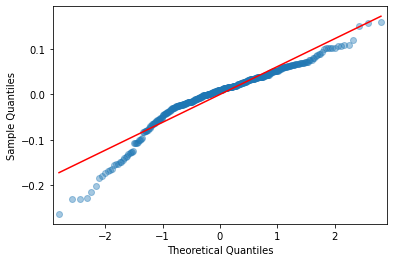

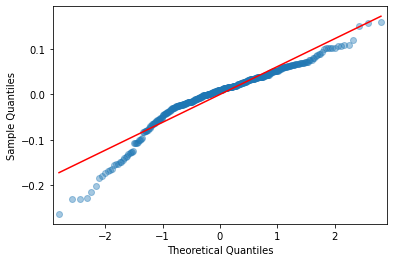

In [71]:
import statsmodels.api as sm 

sm.qqplot(residual, line="r", alpha=0.4) 

In [74]:
from scipy.stats import shapiro
from scipy.stats import levene
shapiro(residual)

ShapiroResult(statistic=0.9219251275062561, pvalue=1.4429574885215651e-13)

In [78]:
levene(residual, df['CGPA'],df['GRE'], df['LOR'], df['Research'], df['TOEFL'])

LeveneResult(statistic=637.0497243832577, pvalue=0.0)

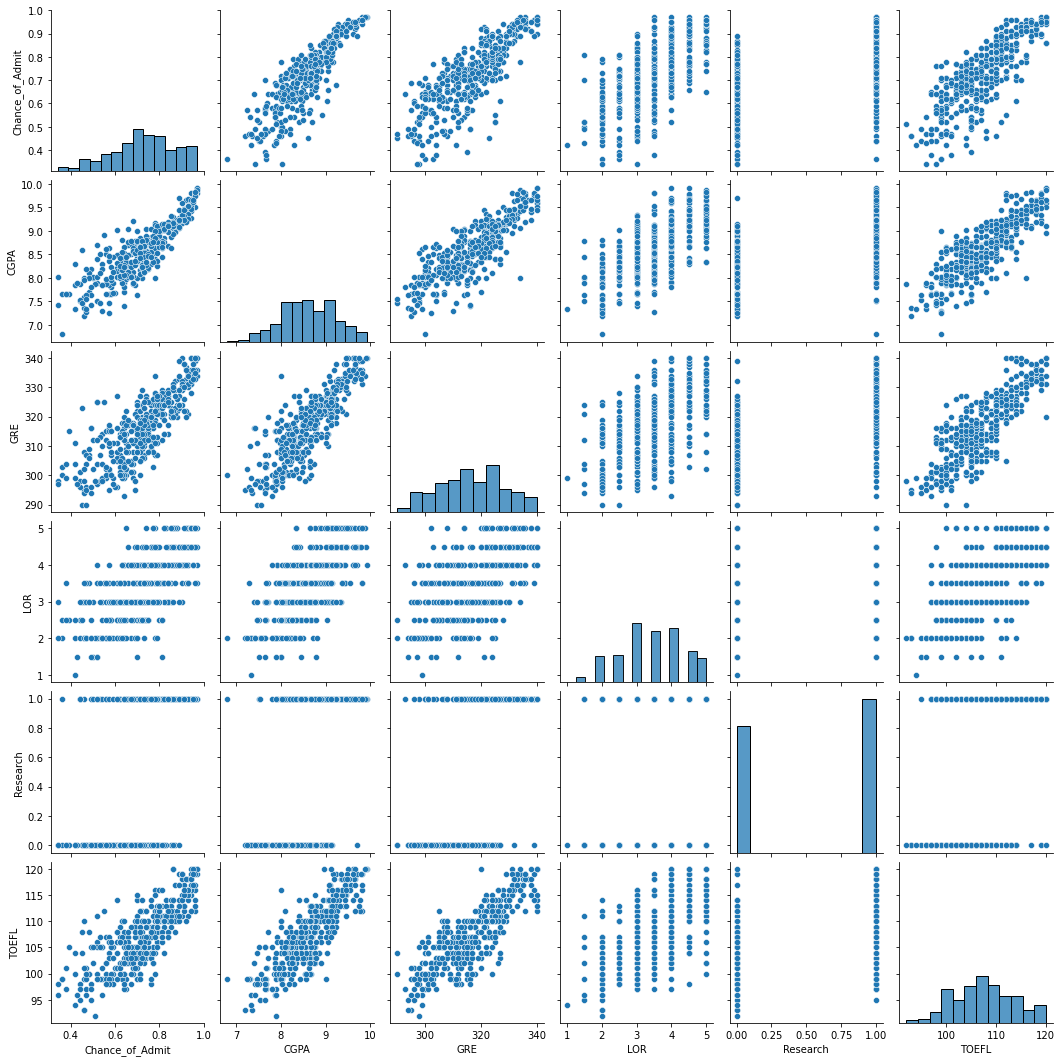

In [81]:
sns.pairplot(df[['Chance_of_Admit','CGPA', 'GRE', 'LOR', 'Research', 'TOEFL']],diag_kind='hist')